In [1]:
import pandas as pd 
import cv2 
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import image_folders as F
import keras
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential,load_model
from sklearn.model_selection import train_test_split
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [2]:
X =[]
path='food'
filenames = sorted(os.listdir(os.path.join(path,"united")))
for file in filenames:
    print(os.path.join(path,"united",file))
    img = img = cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(path,"united",file)), cv2.COLOR_BGR2RGB), (224, 224))
    X.append(img.astype(np.float32))
X = np.array(X)

food/united/cheese1003804.jpg
food/united/cheese1008229.jpg
food/united/cheese1008347.jpg
food/united/cheese1009069.jpg
food/united/cheese1011471.jpg
food/united/cheese1017606.jpg
food/united/cheese1023521.jpg
food/united/cheese1030865.jpg
food/united/cheese1030905.jpg
food/united/cheese1033447.jpg
food/united/cheese1036772.jpg
food/united/cheese1043942.jpg
food/united/cheese1053953.jpg
food/united/cheese1064873.jpg
food/united/cheese1065984.jpg
food/united/cheese1067080.jpg
food/united/cheese1067737.jpg
food/united/cheese1069072.jpg
food/united/cheese1070985.jpg
food/united/cheese1073426.jpg
food/united/cheese1075611.jpg
food/united/cheese1092360.jpg
food/united/cheese1097462.jpg
food/united/cheese1097827.jpg
food/united/cheese1099770.jpg
food/united/cheese1101209.jpg
food/united/cheese1102817.jpg
food/united/cheese1107124.jpg
food/united/cheese1109636.jpg
food/united/cheese1115348.jpg
food/united/cheese1129656.jpg
food/united/cheese1144322.jpg
food/united/cheese1147266.jpg
food/unite

food/united/cheese1961793.jpg
food/united/cheese1962356.jpg
food/united/cheese1970400.jpg
food/united/cheese1971308.jpg
food/united/cheese1971615.jpg
food/united/cheese1972173.jpg
food/united/cheese1975548.jpg
food/united/cheese1976426.jpg
food/united/cheese198373.jpg
food/united/cheese1986973.jpg
food/united/cheese1993646.jpg
food/united/cheese1998540.jpg
food/united/cheese1998564.jpg
food/united/cheese1_0.jpg
food/united/cheese1_1.jpg
food/united/cheese1_10.jpg
food/united/cheese1_100.jpg
food/united/cheese1_101.jpg
food/united/cheese1_102.jpg
food/united/cheese1_103.jpg
food/united/cheese1_104.jpg
food/united/cheese1_105.jpg
food/united/cheese1_106.jpg
food/united/cheese1_107.jpg
food/united/cheese1_108.jpg
food/united/cheese1_109.jpg
food/united/cheese1_11.jpg
food/united/cheese1_110.jpg
food/united/cheese1_111.jpg
food/united/cheese1_112.jpg
food/united/cheese1_113.jpg
food/united/cheese1_114.jpg
food/united/cheese1_115.jpg
food/united/cheese1_116.jpg
food/united/cheese1_117.jpg
f

food/united/cheese3678228.jpg
food/united/cheese3734477.jpg
food/united/cheese374169.jpg
food/united/cheese374312.jpg
food/united/cheese3765562.jpg
food/united/cheese3769611.jpg
food/united/cheese3770494.jpg
food/united/cheese388572.jpg
food/united/cheese393447.jpg
food/united/cheese405743.jpg
food/united/cheese418833.jpg
food/united/cheese419097.jpg
food/united/cheese437823.jpg
food/united/cheese440491.jpg
food/united/cheese442888.jpg
food/united/cheese444531.jpg
food/united/cheese444612.jpg
food/united/cheese448889.jpg
food/united/cheese452590.jpg
food/united/cheese453073.jpg
food/united/cheese453415.jpg
food/united/cheese454078.jpg
food/united/cheese456505.jpg
food/united/cheese463715.jpg
food/united/cheese464502.jpg
food/united/cheese467904.jpg
food/united/cheese474951.jpg
food/united/cheese477493.jpg
food/united/cheese488896.jpg
food/united/cheese498310.jpg
food/united/cheese498962.jpg
food/united/cheese499124.jpg
food/united/cheese499688.jpg
food/united/cheese504113.jpg
food/unit

food/united/egg3_412.jpg
food/united/egg3_413.jpg
food/united/egg3_414.jpg
food/united/egg3_415.jpg
food/united/egg3_416.jpg
food/united/egg3_417.jpg
food/united/egg3_418.jpg
food/united/egg3_419.jpg
food/united/egg3_42.jpg
food/united/egg3_420.jpg
food/united/egg3_421.jpg
food/united/egg3_422.jpg
food/united/egg3_423.jpg
food/united/egg3_424.jpg
food/united/egg3_425.jpg
food/united/egg3_426.jpg
food/united/egg3_427.jpg
food/united/egg3_428.jpg
food/united/egg3_429.jpg
food/united/egg3_43.jpg
food/united/egg3_430.jpg
food/united/egg3_431.jpg
food/united/egg3_432.jpg
food/united/egg3_433.jpg
food/united/egg3_434.jpg
food/united/egg3_435.jpg
food/united/egg3_436.jpg
food/united/egg3_437.jpg
food/united/egg3_438.jpg
food/united/egg3_439.jpg
food/united/egg3_44.jpg
food/united/egg3_440.jpg
food/united/egg3_441.jpg
food/united/egg3_442.jpg
food/united/egg3_443.jpg
food/united/egg3_444.jpg
food/united/egg3_445.jpg
food/united/egg3_446.jpg
food/united/egg3_447.jpg
food/united/egg3_448.jpg
foo

food/united/egg3_894.jpg
food/united/egg3_895.jpg
food/united/egg3_896.jpg
food/united/egg3_897.jpg
food/united/egg3_898.jpg
food/united/egg3_899.jpg
food/united/egg3_9.jpg
food/united/egg3_90.jpg
food/united/egg3_900.jpg
food/united/egg3_901.jpg
food/united/egg3_902.jpg
food/united/egg3_903.jpg
food/united/egg3_904.jpg
food/united/egg3_905.jpg
food/united/egg3_906.jpg
food/united/egg3_907.jpg
food/united/egg3_908.jpg
food/united/egg3_909.jpg
food/united/egg3_91.jpg
food/united/egg3_910.jpg
food/united/egg3_911.jpg
food/united/egg3_912.jpg
food/united/egg3_913.jpg
food/united/egg3_914.jpg
food/united/egg3_915.jpg
food/united/egg3_916.jpg
food/united/egg3_917.jpg
food/united/egg3_918.jpg
food/united/egg3_919.jpg
food/united/egg3_92.jpg
food/united/egg3_920.jpg
food/united/egg3_921.jpg
food/united/egg3_922.jpg
food/united/egg3_923.jpg
food/united/egg3_924.jpg
food/united/egg3_925.jpg
food/united/egg3_926.jpg
food/united/egg3_927.jpg
food/united/egg3_928.jpg
food/united/egg3_929.jpg
food/

food/united/fruit&veggie10_224.jpg
food/united/fruit&veggie10_225.jpg
food/united/fruit&veggie10_226.jpg
food/united/fruit&veggie10_227.jpg
food/united/fruit&veggie10_228.jpg
food/united/fruit&veggie10_229.jpg
food/united/fruit&veggie10_23.jpg
food/united/fruit&veggie10_230.jpg
food/united/fruit&veggie10_231.jpg
food/united/fruit&veggie10_232.jpg
food/united/fruit&veggie10_233.jpg
food/united/fruit&veggie10_234.jpg
food/united/fruit&veggie10_235.jpg
food/united/fruit&veggie10_236.jpg
food/united/fruit&veggie10_237.jpg
food/united/fruit&veggie10_238.jpg
food/united/fruit&veggie10_239.jpg
food/united/fruit&veggie10_24.jpg
food/united/fruit&veggie10_240.jpg
food/united/fruit&veggie10_241.jpg
food/united/fruit&veggie10_242.jpg
food/united/fruit&veggie10_243.jpg
food/united/fruit&veggie10_244.jpg
food/united/fruit&veggie10_245.jpg
food/united/fruit&veggie10_246.jpg
food/united/fruit&veggie10_247.jpg
food/united/fruit&veggie10_248.jpg
food/united/fruit&veggie10_249.jpg
food/united/fruit&vegg

food/united/fruit&veggie10_451.jpg
food/united/fruit&veggie10_452.jpg
food/united/fruit&veggie10_453.jpg
food/united/fruit&veggie10_454.jpg
food/united/fruit&veggie10_455.jpg
food/united/fruit&veggie10_456.jpg
food/united/fruit&veggie10_457.jpg
food/united/fruit&veggie10_458.jpg
food/united/fruit&veggie10_459.jpg
food/united/fruit&veggie10_46.jpg
food/united/fruit&veggie10_460.jpg
food/united/fruit&veggie10_461.jpg
food/united/fruit&veggie10_462.jpg
food/united/fruit&veggie10_463.jpg
food/united/fruit&veggie10_464.jpg
food/united/fruit&veggie10_465.jpg
food/united/fruit&veggie10_466.jpg
food/united/fruit&veggie10_467.jpg
food/united/fruit&veggie10_468.jpg
food/united/fruit&veggie10_469.jpg
food/united/fruit&veggie10_47.jpg
food/united/fruit&veggie10_470.jpg
food/united/fruit&veggie10_471.jpg
food/united/fruit&veggie10_472.jpg
food/united/fruit&veggie10_473.jpg
food/united/fruit&veggie10_474.jpg
food/united/fruit&veggie10_475.jpg
food/united/fruit&veggie10_476.jpg
food/united/fruit&vegg

food/united/fruit&veggie10_683.jpg
food/united/fruit&veggie10_684.jpg
food/united/fruit&veggie10_685.jpg
food/united/fruit&veggie10_686.jpg
food/united/fruit&veggie10_687.jpg
food/united/fruit&veggie10_688.jpg
food/united/fruit&veggie10_689.jpg
food/united/fruit&veggie10_69.jpg
food/united/fruit&veggie10_690.jpg
food/united/fruit&veggie10_691.jpg
food/united/fruit&veggie10_692.jpg
food/united/fruit&veggie10_693.jpg
food/united/fruit&veggie10_694.jpg
food/united/fruit&veggie10_695.jpg
food/united/fruit&veggie10_696.jpg
food/united/fruit&veggie10_697.jpg
food/united/fruit&veggie10_698.jpg
food/united/fruit&veggie10_699.jpg
food/united/fruit&veggie10_7.jpg
food/united/fruit&veggie10_70.jpg
food/united/fruit&veggie10_700.jpg
food/united/fruit&veggie10_701.jpg
food/united/fruit&veggie10_702.jpg
food/united/fruit&veggie10_703.jpg
food/united/fruit&veggie10_704.jpg
food/united/fruit&veggie10_705.jpg
food/united/fruit&veggie10_706.jpg
food/united/fruit&veggie10_707.jpg
food/united/fruit&veggie

food/united/fruit&veggie730009.jpg
food/united/fruit&veggie741556.jpg
food/united/fruit&veggie743122.jpg
food/united/fruit&veggie748073.jpg
food/united/fruit&veggie748612.jpg
food/united/fruit&veggie749886.jpg
food/united/fruit&veggie751141.jpg
food/united/fruit&veggie755473.jpg
food/united/fruit&veggie755756.jpg
food/united/fruit&veggie756867.jpg
food/united/fruit&veggie763102.jpg
food/united/fruit&veggie767840.jpg
food/united/fruit&veggie772092.jpg
food/united/fruit&veggie775939.jpg
food/united/fruit&veggie779494.jpg
food/united/fruit&veggie780006.jpg
food/united/fruit&veggie780114.jpg
food/united/fruit&veggie783990.jpg
food/united/fruit&veggie785212.jpg
food/united/fruit&veggie785556.jpg
food/united/fruit&veggie797867.jpg
food/united/fruit&veggie803001.jpg
food/united/fruit&veggie803256.jpg
food/united/fruit&veggie808656.jpg
food/united/fruit&veggie809216.jpg
food/united/fruit&veggie810270.jpg
food/united/fruit&veggie815406.jpg
food/united/fruit&veggie818560.jpg
food/united/fruit&ve

food/united/hamburger2537940.jpg
food/united/hamburger2551984.jpg
food/united/hamburger2560683.jpg
food/united/hamburger2562323.jpg
food/united/hamburger256294.jpg
food/united/hamburger256317.jpg
food/united/hamburger2564531.jpg
food/united/hamburger2565475.jpg
food/united/hamburger2566738.jpg
food/united/hamburger2573191.jpg
food/united/hamburger2574916.jpg
food/united/hamburger258288.jpg
food/united/hamburger258503.jpg
food/united/hamburger2588852.jpg
food/united/hamburger2591266.jpg
food/united/hamburger2591354.jpg
food/united/hamburger2599548.jpg
food/united/hamburger2608021.jpg
food/united/hamburger2609270.jpg
food/united/hamburger2612278.jpg
food/united/hamburger2612664.jpg
food/united/hamburger2619287.jpg
food/united/hamburger2622394.jpg
food/united/hamburger2622458.jpg
food/united/hamburger2623364.jpg
food/united/hamburger2626189.jpg
food/united/hamburger2630526.jpg
food/united/hamburger2634081.jpg
food/united/hamburger2662814.jpg
food/united/hamburger2663947.jpg
food/united/ha

food/united/hamburger3543840.jpg
food/united/hamburger3549095.jpg
food/united/hamburger3550428.jpg
food/united/hamburger3555912.jpg
food/united/hamburger3563379.jpg
food/united/hamburger3568995.jpg
food/united/hamburger3570133.jpg
food/united/hamburger3570287.jpg
food/united/hamburger3575210.jpg
food/united/hamburger3577815.jpg
food/united/hamburger3577939.jpg
food/united/hamburger3581748.jpg
food/united/hamburger3583066.jpg
food/united/hamburger3594693.jpg
food/united/hamburger360082.jpg
food/united/hamburger3606132.jpg
food/united/hamburger3606601.jpg
food/united/hamburger3616027.jpg
food/united/hamburger3634090.jpg
food/united/hamburger3637949.jpg
food/united/hamburger3640020.jpg
food/united/hamburger3643079.jpg
food/united/hamburger3643495.jpg
food/united/hamburger3647386.jpg
food/united/hamburger3652790.jpg
food/united/hamburger3655355.jpg
food/united/hamburger3655547.jpg
food/united/hamburger3665956.jpg
food/united/hamburger3667950.jpg
food/united/hamburger3670065.jpg
food/united

food/united/meat5_23.jpg
food/united/meat5_230.jpg
food/united/meat5_231.jpg
food/united/meat5_232.jpg
food/united/meat5_233.jpg
food/united/meat5_234.jpg
food/united/meat5_235.jpg
food/united/meat5_236.jpg
food/united/meat5_237.jpg
food/united/meat5_238.jpg
food/united/meat5_239.jpg
food/united/meat5_24.jpg
food/united/meat5_240.jpg
food/united/meat5_241.jpg
food/united/meat5_242.jpg
food/united/meat5_243.jpg
food/united/meat5_244.jpg
food/united/meat5_245.jpg
food/united/meat5_246.jpg
food/united/meat5_247.jpg
food/united/meat5_248.jpg
food/united/meat5_249.jpg
food/united/meat5_25.jpg
food/united/meat5_250.jpg
food/united/meat5_251.jpg
food/united/meat5_252.jpg
food/united/meat5_253.jpg
food/united/meat5_254.jpg
food/united/meat5_255.jpg
food/united/meat5_256.jpg
food/united/meat5_257.jpg
food/united/meat5_258.jpg
food/united/meat5_259.jpg
food/united/meat5_26.jpg
food/united/meat5_260.jpg
food/united/meat5_261.jpg
food/united/meat5_262.jpg
food/united/meat5_263.jpg
food/united/meat

food/united/meat5_684.jpg
food/united/meat5_685.jpg
food/united/meat5_686.jpg
food/united/meat5_687.jpg
food/united/meat5_688.jpg
food/united/meat5_689.jpg
food/united/meat5_69.jpg
food/united/meat5_690.jpg
food/united/meat5_691.jpg
food/united/meat5_692.jpg
food/united/meat5_693.jpg
food/united/meat5_694.jpg
food/united/meat5_695.jpg
food/united/meat5_696.jpg
food/united/meat5_697.jpg
food/united/meat5_698.jpg
food/united/meat5_699.jpg
food/united/meat5_7.jpg
food/united/meat5_70.jpg
food/united/meat5_700.jpg
food/united/meat5_701.jpg
food/united/meat5_702.jpg
food/united/meat5_703.jpg
food/united/meat5_704.jpg
food/united/meat5_705.jpg
food/united/meat5_706.jpg
food/united/meat5_707.jpg
food/united/meat5_708.jpg
food/united/meat5_709.jpg
food/united/meat5_71.jpg
food/united/meat5_710.jpg
food/united/meat5_711.jpg
food/united/meat5_712.jpg
food/united/meat5_713.jpg
food/united/meat5_714.jpg
food/united/meat5_715.jpg
food/united/meat5_716.jpg
food/united/meat5_717.jpg
food/united/meat5

food/united/pasta2916740.jpg
food/united/pasta2917628.jpg
food/united/pasta2920781.jpg
food/united/pasta2926794.jpg
food/united/pasta2930419.jpg
food/united/pasta2933678.jpg
food/united/pasta2937908.jpg
food/united/pasta2938942.jpg
food/united/pasta2941058.jpg
food/united/pasta2943577.jpg
food/united/pasta2949023.jpg
food/united/pasta2952800.jpg
food/united/pasta2963755.jpg
food/united/pasta2964505.jpg
food/united/pasta2967972.jpg
food/united/pasta2969244.jpg
food/united/pasta2969931.jpg
food/united/pasta2970701.jpg
food/united/pasta2972539.jpg
food/united/pasta2978646.jpg
food/united/pasta2980079.jpg
food/united/pasta2980116.jpg
food/united/pasta2989118.jpg
food/united/pasta2996359.jpg
food/united/pasta2999193.jpg
food/united/pasta2999309.jpg
food/united/pasta3003788.jpg
food/united/pasta3005712.jpg
food/united/pasta3005964.jpg
food/united/pasta3007092.jpg
food/united/pasta3007698.jpg
food/united/pasta3010608.jpg
food/united/pasta3011123.jpg
food/united/pasta3011319.jpg
food/united/pa

food/united/pasta6_220.jpg
food/united/pasta6_221.jpg
food/united/pasta6_222.jpg
food/united/pasta6_223.jpg
food/united/pasta6_224.jpg
food/united/pasta6_225.jpg
food/united/pasta6_226.jpg
food/united/pasta6_227.jpg
food/united/pasta6_228.jpg
food/united/pasta6_229.jpg
food/united/pasta6_23.jpg
food/united/pasta6_230.jpg
food/united/pasta6_231.jpg
food/united/pasta6_232.jpg
food/united/pasta6_233.jpg
food/united/pasta6_234.jpg
food/united/pasta6_235.jpg
food/united/pasta6_236.jpg
food/united/pasta6_237.jpg
food/united/pasta6_238.jpg
food/united/pasta6_239.jpg
food/united/pasta6_24.jpg
food/united/pasta6_240.jpg
food/united/pasta6_241.jpg
food/united/pasta6_242.jpg
food/united/pasta6_243.jpg
food/united/pasta6_244.jpg
food/united/pasta6_245.jpg
food/united/pasta6_246.jpg
food/united/pasta6_247.jpg
food/united/pasta6_248.jpg
food/united/pasta6_249.jpg
food/united/pasta6_25.jpg
food/united/pasta6_250.jpg
food/united/pasta6_251.jpg
food/united/pasta6_252.jpg
food/united/pasta6_253.jpg
food

food/united/pizza1423515.jpg
food/united/pizza1425089.jpg
food/united/pizza1426781.jpg
food/united/pizza143453.jpg
food/united/pizza1445608.jpg
food/united/pizza144631.jpg
food/united/pizza1454995.jpg
food/united/pizza1459760.jpg
food/united/pizza1468795.jpg
food/united/pizza1475479.jpg
food/united/pizza147785.jpg
food/united/pizza1484836.jpg
food/united/pizza148765.jpg
food/united/pizza1499661.jpg
food/united/pizza1503858.jpg
food/united/pizza1504421.jpg
food/united/pizza1504719.jpg
food/united/pizza1506213.jpg
food/united/pizza1507019.jpg
food/united/pizza1507039.jpg
food/united/pizza1512514.jpg
food/united/pizza1512557.jpg
food/united/pizza1524599.jpg
food/united/pizza1524655.jpg
food/united/pizza153195.jpg
food/united/pizza1535273.jpg
food/united/pizza1544197.jpg
food/united/pizza1552253.jpg
food/united/pizza1553353.jpg
food/united/pizza1555015.jpg
food/united/pizza1571074.jpg
food/united/pizza1572608.jpg
food/united/pizza1573562.jpg
food/united/pizza1576248.jpg
food/united/pizza15

food/united/pizza3379038.jpg
food/united/pizza3382880.jpg
food/united/pizza3383977.jpg
food/united/pizza3384856.jpg
food/united/pizza3385460.jpg
food/united/pizza338838.jpg
food/united/pizza3391208.jpg
food/united/pizza3392194.jpg
food/united/pizza3392649.jpg
food/united/pizza3392671.jpg
food/united/pizza3393898.jpg
food/united/pizza3397336.jpg
food/united/pizza3398309.jpg
food/united/pizza3399610.jpg
food/united/pizza3401720.jpg
food/united/pizza3401767.jpg
food/united/pizza340814.jpg
food/united/pizza341377.jpg
food/united/pizza3425999.jpg
food/united/pizza3426946.jpg
food/united/pizza3427699.jpg
food/united/pizza3430418.jpg
food/united/pizza3434372.jpg
food/united/pizza343480.jpg
food/united/pizza3441394.jpg
food/united/pizza3442426.jpg
food/united/pizza3443136.jpg
food/united/pizza344397.jpg
food/united/pizza3456440.jpg
food/united/pizza3456604.jpg
food/united/pizza346091.jpg
food/united/pizza3462250.jpg
food/united/pizza34632.jpg
food/united/pizza3464027.jpg
food/united/pizza34648

food/united/rice119047.jpg
food/united/rice1191151.jpg
food/united/rice1193731.jpg
food/united/rice1194902.jpg
food/united/rice1195255.jpg
food/united/rice1197125.jpg
food/united/rice1200965.jpg
food/united/rice1204968.jpg
food/united/rice1205475.jpg
food/united/rice1219625.jpg
food/united/rice1221967.jpg
food/united/rice1223362.jpg
food/united/rice1227753.jpg
food/united/rice1232786.jpg
food/united/rice1236551.jpg
food/united/rice1238741.jpg
food/united/rice1240836.jpg
food/united/rice1242614.jpg
food/united/rice1250145.jpg
food/united/rice1252290.jpg
food/united/rice1252555.jpg
food/united/rice1252624.jpg
food/united/rice125464.jpg
food/united/rice1260082.jpg
food/united/rice1267123.jpg
food/united/rice1268221.jpg
food/united/rice127048.jpg
food/united/rice1270775.jpg
food/united/rice1273265.jpg
food/united/rice1273788.jpg
food/united/rice1275402.jpg
food/united/rice1276635.jpg
food/united/rice1279146.jpg
food/united/rice1281471.jpg
food/united/rice1285028.jpg
food/united/rice128946.

food/united/rice2883586.jpg
food/united/rice2888901.jpg
food/united/rice2890089.jpg
food/united/rice289532.jpg
food/united/rice28981.jpg
food/united/rice2899815.jpg
food/united/rice2900064.jpg
food/united/rice2906721.jpg
food/united/rice2908.jpg
food/united/rice2908039.jpg
food/united/rice291296.jpg
food/united/rice2915617.jpg
food/united/rice2928684.jpg
food/united/rice2930057.jpg
food/united/rice2934149.jpg
food/united/rice293560.jpg
food/united/rice2938659.jpg
food/united/rice2940418.jpg
food/united/rice2943239.jpg
food/united/rice2947946.jpg
food/united/rice2956715.jpg
food/united/rice2965537.jpg
food/united/rice2968258.jpg
food/united/rice2982087.jpg
food/united/rice2986320.jpg
food/united/rice2990769.jpg
food/united/rice2993049.jpg
food/united/rice2993325.jpg
food/united/rice299653.jpg
food/united/rice299732.jpg
food/united/rice2998402.jpg
food/united/rice301083.jpg
food/united/rice3013414.jpg
food/united/rice3021223.jpg
food/united/rice3026143.jpg
food/united/rice3034238.jpg
foo

food/united/rice7_82.jpg
food/united/rice7_83.jpg
food/united/rice7_84.jpg
food/united/rice7_85.jpg
food/united/rice7_86.jpg
food/united/rice7_87.jpg
food/united/rice7_88.jpg
food/united/rice7_89.jpg
food/united/rice7_9.jpg
food/united/rice7_90.jpg
food/united/rice7_91.jpg
food/united/rice7_92.jpg
food/united/rice7_93.jpg
food/united/rice7_94.jpg
food/united/rice7_95.jpg
food/united/rice7_96.jpg
food/united/rice7_97.jpg
food/united/rice7_98.jpg
food/united/rice7_99.jpg
food/united/rice805390.jpg
food/united/rice816153.jpg
food/united/rice818725.jpg
food/united/rice820016.jpg
food/united/rice823847.jpg
food/united/rice829538.jpg
food/united/rice833591.jpg
food/united/rice833835.jpg
food/united/rice834665.jpg
food/united/rice855247.jpg
food/united/rice862508.jpg
food/united/rice86512.jpg
food/united/rice865507.jpg
food/united/rice870449.jpg
food/united/rice883486.jpg
food/united/rice883930.jpg
food/united/rice887923.jpg
food/united/rice894741.jpg
food/united/rice899596.jpg
food/united/ri

In [3]:
y=np.concatenate((np.zeros(1000),np.ones(1000), np.array([float(2)]*1000),np.array([float(3)]*1000),np.array([float(4)]*1000),np.array([float(5)]*1000),np.array([float(6)]*1000),np.array([float(7)]*1000)))
train_X, test_X, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
train_X = train_X/255.0
test_X = test_X/255.0

In [5]:
n_classes = 8
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes=n_classes, dtype='float32')
y_test = keras.utils.to_categorical(y_test, num_classes=n_classes, dtype='float32')

In [6]:
train_X.shape

(6400, 64, 64, 3)

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',input_shape = train_X.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
 
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
batch_size = 32
epochs = 15
model.fit(train_X, y_train,
        batch_size=batch_size,
        epochs=epochs,
        verbose=1,
        validation_data=(test_X, y_test))

model.summary() 



Train on 6400 samples, validate on 1600 samples
Epoch 1/20
6400/6400 [==============================] - 23s 4ms/step - loss: 2.0801 - accuracy: 0.1363 - val_loss: 2.0680 - val_accuracy: 0.1756
Epoch 2/20
6400/6400 [==============================] - 28s 4ms/step - loss: 1.9998 - accuracy: 0.1833 - val_loss: 1.9478 - val_accuracy: 0.2500
Epoch 3/20
6400/6400 [==============================] - 30s 5ms/step - loss: 1.8826 - accuracy: 0.2733 - val_loss: 1.8610 - val_accuracy: 0.3025
Epoch 4/20
6400/6400 [==============================] - 32s 5ms/step - loss: 1.8090 - accuracy: 0.3206 - val_loss: 1.7631 - val_accuracy: 0.3738
Epoch 5/20
6400/6400 [==============================] - 27s 4ms/step - loss: 1.7201 - accuracy: 0.3448 - val_loss: 1.6509 - val_accuracy: 0.4025
Epoch 6/20
6400/6400 [==============================] - 27s 4ms/step - loss: 1.6615 - accuracy: 0.3802 - val_loss: 1.5885 - val_accuracy: 0.4369
Epoch 7/20
6400/6400 [==============================] - 27s 4ms/step - loss: 1.6

In [8]:
score = model.evaluate(test_X, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.2060769736766814
Test accuracy: 0.5643749833106995


In [9]:
from keras.models import load_model 
model.save('model.h5')

In [10]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")

[1.3451000e-03 5.3072590e-03 9.7400451e-01 1.0334796e-02 5.0827512e-03
 2.1516385e-04 3.3661623e-03 3.4422590e-04]
2


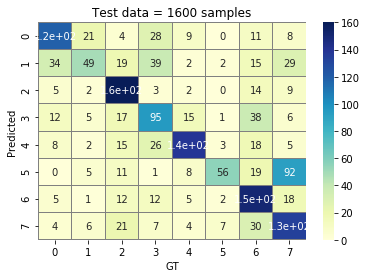

In [11]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

## Use argmax to project output probabilites as class index label
proba = model.predict(test_X)
print(proba[0])
y_pred = np.argmax(proba, axis=1)
print(y_pred[0])
y_t = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_t, y_pred)
sns.heatmap(cm, annot=True, linewidths=0.01, cmap="YlGnBu", linecolor="gray")

plt.xlabel("GT")
plt.ylabel("Predicted")
plt.title(f"Test data = {len(y_pred)} samples")
plt.show()

In [12]:
img = test_X[30]
pred = model.predict(np.expand_dims(img,axis=0))[0]
print(pred[0],pred[1], pred[2],pred[3],pred[4], pred[5], pred[6], pred[7], max(pred))
classses = ['cheese','egg','fruit&veggies''hamburguer','meat','pasta','pizza','rice']

0.00025886085 0.026080525 0.0007123655 0.0024549998 0.0008035514 0.39850846 0.034300018 0.53688115 0.53688115


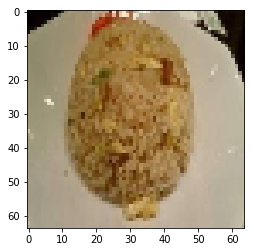

In [13]:
plt.imshow(img)

0.019126698 0.052679803 0.30633885 0.08332451 0.04209114 0.05518034 0.34850132 0.09275731 0.34850132


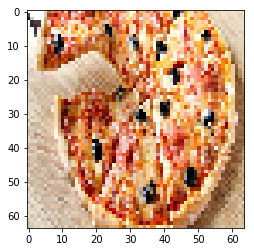

In [30]:
image_dir = ('food/pizza.jpg')
image = cv2.cvtColor(cv2.imread(image_dir), cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (64,64))   
np_image= np.array(image, dtype=np.float32) / 255.0
pred = model.predict(np.expand_dims(np_image,axis=0))[0]
print(pred[0],pred[1], pred[2],pred[3],pred[4], pred[5], pred[6], pred[7], max(pred))
plt.imshow(np_image)